In [1]:
import h2o

In [7]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 17 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_laksh_aa32wb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.711 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [4]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv"
iris = h2o.import_file(url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [36]:
train, test =iris.split_frame([0.8], seed = 123)

In [37]:
x = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid' ]

In [38]:
m_AE_4 = H2OAutoEncoderEstimator(
    hidden =[4],
    activation = "Tanh",#preferred for auto encoders
    epochs = 300, #300
    model_id = "m_AE_4",
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
)
%time m_AE_4.train(x,None, train)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Wall time: 8.18 s
Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  m_AE_4


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 40 weights/biases, 3.4 KB, 36,300 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,4,Input,0.0,,,,,,,,,
1,,2,4,Tanh,0.0,0.0,0.0,0.055096,0.013541,0.0,0.030816,0.487689,-0.02363,0.058923
2,,3,4,Tanh,,0.0,0.0,0.064879,0.021702,0.0,0.084691,0.610827,0.069673,0.039287




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 7.81836101712461e-05
RMSE: 0.00884214963519879

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2022-03-02 04:35:46,0.017 sec,0.00000 obs/sec,0.0,0,0.0,0.268939,0.072328
1,,2022-03-02 04:35:46,0.032 sec,15125 obs/sec,2.0,2,242.0,0.173747,0.030188
2,,2022-03-02 04:35:46,0.048 sec,45375 obs/sec,12.0,12,1452.0,0.098967,0.009795
3,,2022-03-02 04:35:46,0.063 sec,121000 obs/sec,47.0,47,5687.0,0.030320,0.000919
4,,2022-03-02 04:35:46,0.079 sec,159412 obs/sec,83.0,83,10043.0,0.020244,0.000410
5,,2022-03-02 04:35:46,0.095 sec,183797 obs/sec,120.0,120,14520.0,0.015283,0.000234
6,,2022-03-02 04:35:46,0.110 sec,196946 obs/sec,153.0,153,18513.0,0.012471,0.000156
7,,2022-03-02 04:35:46,0.126 sec,202400 obs/sec,184.0,184,22264.0,0.010739,0.000115
8,,2022-03-02 04:35:46,0.142 sec,210309 obs/sec,219.0,219,26499.0,0.009892,0.000098
9,,2022-03-02 04:35:46,0.157 sec,206815 obs/sec,241.0,241,29161.0,0.009480,0.000090



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,sepal_wid,1.000000,1.000000,0.293361
1,petal_wid,0.896209,0.896209,0.262913
2,sepal_len,0.883741,0.883741,0.259255
3,petal_len,0.628817,0.628817,0.184470


In [44]:
sh =m_AE_4.score_history()

In [45]:
sh.shape

(13, 9)

In [46]:
sh.head()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2022-03-02 04:35:46,0.017 sec,0.00000 obs/sec,0.0,0,0.0,0.268939,0.072328
1,,2022-03-02 04:35:46,0.032 sec,15125 obs/sec,2.0,2,242.0,0.173747,0.030188
2,,2022-03-02 04:35:46,0.048 sec,45375 obs/sec,12.0,12,1452.0,0.098967,0.009795
3,,2022-03-02 04:35:46,0.063 sec,121000 obs/sec,47.0,47,5687.0,0.030320,0.000919
4,,2022-03-02 04:35:46,0.079 sec,159412 obs/sec,83.0,83,10043.0,0.020244,0.000410


<AxesSubplot:>

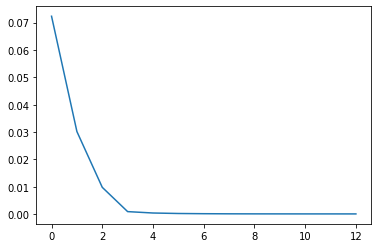

In [47]:
sh.training_mse.plot()

<AxesSubplot:>

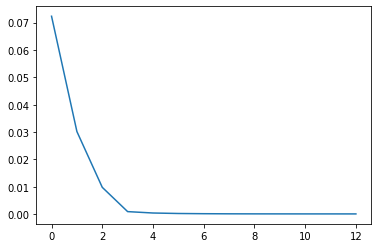

In [48]:
sh["training_mse"].tail(50).plot()

In [49]:
m_AE_4 = H2OAutoEncoderEstimator(
    hidden =[4],
    activation = "Tanh",#preferred for auto encoders
    epochs = 300, #300
    model_id = "m_AE_4",
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)
%time m_AE_4.train(x,None, train)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Wall time: 6.16 s
Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  m_AE_4


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 40 weights/biases, 3.4 KB, 36,300 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,4,Input,0.0,,,,,,,,,
1,,2,4,Tanh,0.0,0.0,0.0,0.056289,0.025612,0.0,0.030881,0.478601,0.024864,0.086591
2,,3,4,Tanh,,0.0,0.0,0.125647,0.061135,0.0,-0.012834,0.640644,0.098073,0.070696




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 6.825042125203006e-05
RMSE: 0.00826138131622249

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2022-03-02 04:36:12,0.014 sec,0.00000 obs/sec,0.0,0,0.0,0.286400,0.082025
1,,2022-03-02 04:36:12,0.030 sec,49823 obs/sec,7.0,7,847.0,0.110793,0.012275
2,,2022-03-02 04:36:12,0.046 sec,69666 obs/sec,19.0,19,2299.0,0.065652,0.004310
3,,2022-03-02 04:36:12,0.060 sec,105553 obs/sec,41.0,41,4961.0,0.032118,0.001032
4,,2022-03-02 04:36:12,0.076 sec,136365 obs/sec,71.0,71,8591.0,0.023409,0.000548
5,,2022-03-02 04:36:12,0.092 sec,166949 obs/sec,109.0,109,13189.0,0.019139,0.000366
6,,2022-03-02 04:36:12,0.107 sec,182787 obs/sec,142.0,142,17182.0,0.015551,0.000242
7,,2022-03-02 04:36:12,0.123 sec,200200 obs/sec,182.0,182,22022.0,0.009112,0.000083
8,,2022-03-02 04:36:12,0.139 sec,215111 obs/sec,224.0,224,27104.0,0.009303,0.000087
9,,2022-03-02 04:36:12,0.154 sec,227411 obs/sec,265.0,265,32065.0,0.008337,0.000070



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,petal_wid,1.000000,1.000000,0.357337
1,petal_len,0.698063,0.698063,0.249444
2,sepal_wid,0.607396,0.607396,0.217045
3,sepal_len,0.493019,0.493019,0.176174


In [50]:
sh =m_AE_4.score_history()

<AxesSubplot:>

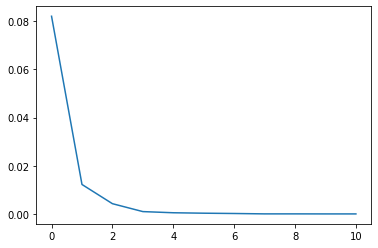

In [51]:
sh["training_mse"].tail(50).plot()

In [52]:
m_AE_3 = H2OAutoEncoderEstimator(
    hidden =[3],
    activation = "Tanh",#preferred for auto encoders
    epochs = 300, #300
    model_id = "m_AE_3",
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)
%time m_AE_3.train(x,None, train)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Wall time: 6.14 s
Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  m_AE_3


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 31 weights/biases, 3.3 KB, 36,300 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,4,Input,0.0,,,,,,,,,
1,,2,3,Tanh,0.0,0.0,0.0,0.046943,0.014381,0.0,-0.023508,0.422748,0.007632,0.078522
2,,3,4,Tanh,,0.0,0.0,0.051372,0.026706,0.0,0.011846,0.6802,0.068175,0.040802




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.0005252643159185376
RMSE: 0.022918645595203433

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2022-03-02 04:36:19,0.017 sec,0.00000 obs/sec,0.0,0,0.0,0.326511,0.106610
1,,2022-03-02 04:36:19,0.024 sec,15125 obs/sec,1.0,1,121.0,0.274259,0.075218
2,,2022-03-02 04:36:19,0.030 sec,18615 obs/sec,2.0,2,242.0,0.221647,0.049127
3,,2022-03-02 04:36:19,0.036 sec,20166 obs/sec,3.0,3,363.0,0.185469,0.034399
4,,2022-03-02 04:36:19,0.040 sec,22000 obs/sec,4.0,4,484.0,0.160377,0.025721
5,,2022-03-02 04:36:19,0.044 sec,24200 obs/sec,5.0,5,605.0,0.141981,0.020159
6,,2022-03-02 04:36:19,0.046 sec,26888 obs/sec,6.0,6,726.0,0.131755,0.017359
7,,2022-03-02 04:36:19,0.049 sec,29206 obs/sec,7.0,7,847.0,0.123904,0.015352
8,,2022-03-02 04:36:19,0.053 sec,30250 obs/sec,8.0,8,968.0,0.117691,0.013851
9,,2022-03-02 04:36:19,0.056 sec,32029 obs/sec,9.0,9,1089.0,0.113619,0.012909



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,petal_wid,1.000000,1.000000,0.296912
1,sepal_len,0.955383,0.955383,0.283665
2,sepal_wid,0.909733,0.909733,0.270111
3,petal_len,0.502883,0.502883,0.149312


In [53]:
sh =m_AE_3.score_history()

<AxesSubplot:>

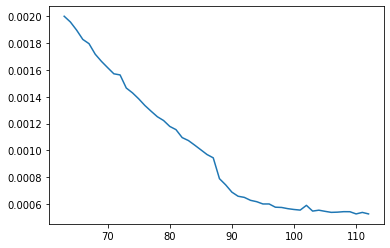

In [54]:
sh["training_mse"].tail(50).plot()

In [55]:
m_AE_3 = H2OAutoEncoderEstimator(
    hidden =[3],
    activation = "Tanh",#preferred for auto encoders
    epochs = 300, #300
    model_id = "m_AE_3",
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 50
)
%time m_AE_3.train(x,None, train)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Wall time: 6.18 s
Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  m_AE_3


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 31 weights/biases, 3.3 KB, 36,300 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,4,Input,0.0,,,,,,,,,
1,,2,3,Tanh,0.0,0.0,0.0,0.04119,0.012154,0.0,0.046234,0.439301,-0.030307,0.063406
2,,3,4,Tanh,,0.0,0.0,0.041134,0.012428,0.0,-0.074146,0.671181,0.063815,0.023546




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.0005417445819495881
RMSE: 0.0232754072348818

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2022-03-02 04:40:50,0.023 sec,0.00000 obs/sec,0.0,0,0.0,0.372526,0.138776
1,,2022-03-02 04:40:50,0.038 sec,7562 obs/sec,1.0,1,121.0,0.342772,0.117492
2,,2022-03-02 04:40:50,0.045 sec,31565 obs/sec,6.0,6,726.0,0.190549,0.036309
3,,2022-03-02 04:40:50,0.051 sec,41724 obs/sec,10.0,10,1210.0,0.118964,0.014152
4,,2022-03-02 04:40:50,0.067 sec,80666 obs/sec,30.0,30,3630.0,0.073555,0.005410
5,,2022-03-02 04:40:50,0.081 sec,114847 obs/sec,56.0,56,6776.0,0.044743,0.002002
6,,2022-03-02 04:40:50,0.097 sec,138746 obs/sec,86.0,86,10406.0,0.037465,0.001404
7,,2022-03-02 04:40:50,0.112 sec,153266 obs/sec,114.0,114,13794.0,0.033824,0.001144
8,,2022-03-02 04:40:50,0.128 sec,154103 obs/sec,135.0,135,16335.0,0.030904,0.000955
9,,2022-03-02 04:40:50,0.144 sec,155713 obs/sec,157.0,157,18997.0,0.027783,0.000772



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,sepal_wid,1.000000,1.000000,0.329136
1,petal_wid,0.772983,0.772983,0.254417
2,sepal_len,0.655835,0.655835,0.215859
3,petal_len,0.609438,0.609438,0.200588


In [56]:
sh =m_AE_3.score_history()

<AxesSubplot:>

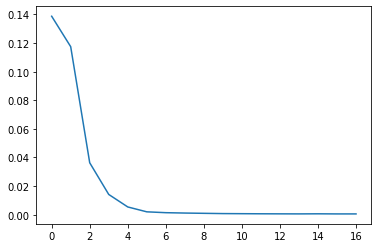

In [57]:
sh["training_mse"].tail(50).plot()

In [60]:
m_AE_2 = H2OAutoEncoderEstimator(
    hidden =[2],
    activation = "Tanh",#preferred for auto encoders
    epochs = 300, #300
    model_id = "m_AE_2",
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 50
)
%time m_AE_2.train(x,None, train)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Wall time: 6.15 s
Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  m_AE_2


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 22 weights/biases, 3.2 KB, 36,300 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,4,Input,0.0,,,,,,,,,
1,,2,2,Tanh,0.0,0.0,0.0,0.035318,0.009231,0.0,-0.208552,0.440372,-0.029981,0.076134
2,,3,4,Tanh,,0.0,0.0,0.013178,0.003163,0.0,-0.323061,0.481998,0.02478,0.052578




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.0028335377248781546
RMSE: 0.05323098463186788

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2022-03-02 04:42:32,0.015 sec,0.00000 obs/sec,0.0,0,0.0,0.447334,0.200108
1,,2022-03-02 04:42:32,0.031 sec,21352 obs/sec,3.0,3,363.0,0.329463,0.108546
2,,2022-03-02 04:42:32,0.046 sec,94531 obs/sec,25.0,25,3025.0,0.098622,0.009726
3,,2022-03-02 04:42:32,0.062 sec,126041 obs/sec,50.0,50,6050.0,0.075276,0.005666
4,,2022-03-02 04:42:32,0.077 sec,149809 obs/sec,78.0,78,9438.0,0.060001,0.003600
5,,2022-03-02 04:42:32,0.093 sec,121000 obs/sec,79.0,79,9559.0,0.059598,0.003552
6,,2022-03-02 04:42:32,0.107 sec,123630 obs/sec,94.0,94,11374.0,0.057170,0.003268
7,,2022-03-02 04:42:32,0.110 sec,121000 obs/sec,95.0,95,11495.0,0.056719,0.003217
8,,2022-03-02 04:42:32,0.114 sec,117333 obs/sec,96.0,96,11616.0,0.056509,0.003193
9,,2022-03-02 04:42:32,0.118 sec,113951 obs/sec,97.0,97,11737.0,0.056507,0.003193



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,sepal_wid,1.000000,1.000000,0.351072
1,petal_wid,0.690950,0.690950,0.242573
2,petal_len,0.630360,0.630360,0.221302
3,sepal_len,0.527107,0.527107,0.185053


In [61]:
sh =m_AE_2.score_history()

<AxesSubplot:>

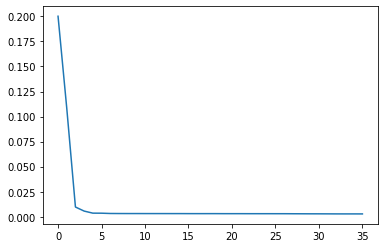

In [62]:
sh["training_mse"].tail(50).plot()

In [63]:
m_AE_1 = H2OAutoEncoderEstimator(
    hidden =[1],
    activation = "Tanh",#preferred for auto encoders
    epochs = 300, #300
    model_id = "m_AE_1",
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 50
)
%time m_AE_1.train(x,None, train)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Wall time: 6.16 s
Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  m_AE_1


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 13 weights/biases, 3.0 KB, 34,485 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,4,Input,0.0,,,,,,,,,
1,,2,1,Tanh,0.0,0.0,0.0,0.030148,0.003234,0.0,-0.323162,0.275535,0.08156,0.0
2,,3,4,Tanh,,0.0,0.0,0.010677,0.004395,0.0,-0.510433,0.432625,0.031538,0.027459




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.011294452083249395
RMSE: 0.10627535971827805

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2022-03-02 04:43:24,0.022 sec,0.00000 obs/sec,0.0,0,0.0,0.297122,0.088281
1,,2022-03-02 04:43:24,0.031 sec,15125 obs/sec,1.0,1,121.0,0.275403,0.075847
2,,2022-03-02 04:43:24,0.036 sec,20166 obs/sec,2.0,2,242.0,0.266691,0.071124
3,,2022-03-02 04:43:24,0.038 sec,25928 obs/sec,3.0,3,363.0,0.259409,0.067293
4,,2022-03-02 04:43:24,0.041 sec,28470 obs/sec,4.0,4,484.0,0.254298,0.064668
5,,2022-03-02 04:43:24,0.044 sec,31842 obs/sec,5.0,5,605.0,0.252510,0.063761
6,,2022-03-02 04:43:24,0.046 sec,34571 obs/sec,6.0,6,726.0,0.245281,0.060163
7,,2022-03-02 04:43:24,0.049 sec,35291 obs/sec,7.0,7,847.0,0.234145,0.054824
8,,2022-03-02 04:43:24,0.052 sec,35851 obs/sec,8.0,8,968.0,0.223378,0.049898
9,,2022-03-02 04:43:24,0.055 sec,36300 obs/sec,9.0,9,1089.0,0.213918,0.045761



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,petal_len,1.000000,1.000000,0.338035
1,petal_wid,0.991758,0.991758,0.335249
2,sepal_len,0.689201,0.689201,0.232974
3,sepal_wid,0.277316,0.277316,0.093743


In [64]:
sh =m_AE_1.score_history()

<AxesSubplot:>

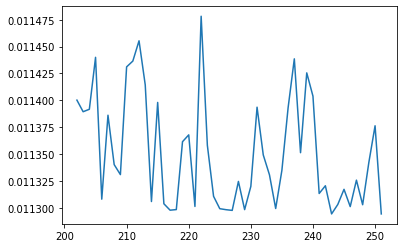

In [65]:
sh["training_mse"].tail(50).plot()

### Multi Layer Encoder

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Wall time: 6.14 s


<AxesSubplot:>

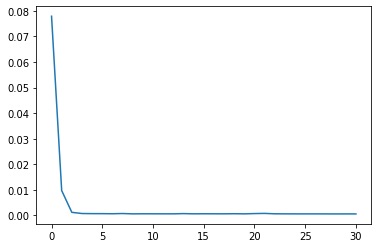

In [66]:
m_AE_5_3_5 = H2OAutoEncoderEstimator(
    hidden =[5,3,5],#symmetry 535 is needed
    activation = "Tanh",#preferred for auto encoders
    epochs = 300, #300
    model_id = "m_AE_5_3_5",
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)
%time m_AE_5_3_5.train(x,None, train)
sh =m_AE_5_3_5.score_history()
sh["training_mse"].tail(50).plot()

### Stacked Encoder

In [67]:
train_AE_3 = m_AE_3.deepfeatures(train,0)#0 means layer 1

deepfeatures progress: |█████████████████████████████████████████████████████████| (done) 100%


In [68]:
train_AE_3.dim

[121, 3]

In [69]:
train_AE_3

DF.L1.C1,DF.L1.C2,DF.L1.C3
-0.298576,0.529011,0.176223
-0.314563,0.468998,0.362551
-0.268618,0.533081,0.338534
-0.262337,0.510247,0.378595
-0.275317,0.554966,0.161652
-0.235552,0.524452,-0.0135017
-0.199968,0.561093,0.294254
-0.292836,0.515016,0.222874
-0.322751,0.519754,0.0548832
-0.263651,0.527773,0.254554


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Wall time: 6.15 s


<AxesSubplot:>

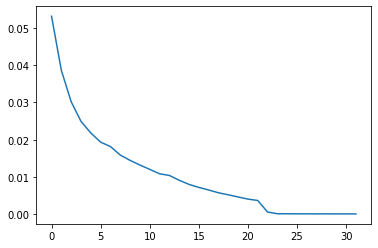

In [71]:
m_AE_3x3 = H2OAutoEncoderEstimator(
    hidden =[3],
    activation = "Tanh",#preferred for auto encoders
    epochs = 300, #300
    model_id = "m_AE_3x3",
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)
%time m_AE_3x3.train([0,1,2],None, train)# deep features in stead of x
sh =m_AE_3x3.score_history()
sh["training_mse"].tail(50).plot()

### Anomalies

In [73]:
x = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid' , 'class']

In [74]:
m_anomaly16 = H2OAutoEncoderEstimator(
    hidden =[16],
    activation = "Tanh",#preferred for auto encoders
    epochs = 300, #300
    model_id = "m_anomaly16",
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)
%time m_anomaly16.train(x,None, iris)# deep features in stead of x


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Wall time: 6.2 s
Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  m_anomaly16


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 280 weights/biases, 6.6 KB, 45,059 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,8,Input,0.0,,,,,,,,,
1,,2,16,Tanh,0.0,0.0,0.0,0.176858,0.320992,0.0,0.031933,0.41541,0.060777,0.248345
2,,3,8,Tanh,,0.0,0.0,0.062985,0.037614,0.0,0.068952,0.434487,0.152626,0.292991




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 3.388789894118188e-05
RMSE: 0.005821331371875499

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2022-03-02 05:06:25,0.019 sec,0.00000 obs/sec,0.000000,0,0.0,0.469888,0.220795
1,,2022-03-02 05:06:25,0.037 sec,19157 obs/sec,2.426667,3,364.0,0.131993,0.017422
2,,2022-03-02 05:06:25,0.043 sec,19800 obs/sec,3.300000,4,495.0,0.105788,0.011191
3,,2022-03-02 05:06:25,0.044 sec,23500 obs/sec,4.073333,5,611.0,0.089123,0.007943
4,,2022-03-02 05:06:25,0.060 sec,39904 obs/sec,11.173333,14,1676.0,0.054280,0.002946
5,,2022-03-02 05:06:25,0.076 sec,66172 obs/sec,25.586667,32,3838.0,0.036175,0.001309
6,,2022-03-02 05:06:25,0.091 sec,82630 obs/sec,40.213333,50,6032.0,0.027316,0.000746
7,,2022-03-02 05:06:25,0.107 sec,93775 obs/sec,55.640000,69,8346.0,0.019588,0.000384
8,,2022-03-02 05:06:25,0.122 sec,100365 obs/sec,69.586667,86,10438.0,0.026332,0.000693
9,,2022-03-02 05:06:25,0.139 sec,106471 obs/sec,85.886667,106,12883.0,0.013544,0.000183



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,class.Iris-virginica,1.000000,1.000000,0.196413
1,class.Iris-setosa,0.936517,0.936517,0.183944
2,class.Iris-versicolor,0.899357,0.899357,0.176645
3,petal_wid,0.605681,0.605681,0.118964
4,sepal_wid,0.582751,0.582751,0.114460
5,petal_len,0.545268,0.545268,0.107098
6,sepal_len,0.521743,0.521743,0.102477
7,class.missing(NA),0.000000,0.000000,0.000000


In [75]:
anomalies = m_anomaly16.anomaly(iris).cbind(iris).as_data_frame()

In [76]:
s = anomalies.sort_values("Reconstruction.MSE", ascending = False)

In [77]:
s.head()#anomalies

,Reconstruction.MSE,sepal_len,sepal_wid,petal_len,petal_wid,class
118,0.000350,7.7,2.6,6.9,2.3,Iris-virginica
15,0.000255,5.7,4.4,1.5,0.4,Iris-setosa
41,0.000184,4.5,2.3,1.3,0.3,Iris-setosa
106,0.000183,4.9,2.5,4.5,1.7,Iris-virginica
131,0.000150,7.9,3.8,6.4,2.0,Iris-virginica


In [78]:
s.tail()

,Reconstruction.MSE,sepal_len,sepal_wid,petal_len,petal_wid,class
126,0.000005,6.2,2.8,4.8,1.8,Iris-virginica
44,0.000005,5.1,3.8,1.9,0.4,Iris-setosa
5,0.000004,5.4,3.9,1.7,0.4,Iris-setosa
19,0.000004,5.1,3.8,1.5,0.3,Iris-setosa
58,0.000003,6.6,2.9,4.6,1.3,Iris-versicolor
